## Data Description

ID_Patient_Care_Situation: Care situation of a patient during treatment
Diagnosed_Condition: The diagnosed condition of the patient
ID_Patient: Patient identifier number
Treatment_with_drugs: Class of drugs used during treatment
Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)
Patient_Age: Age of the patient
Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.
Patient_Smoker: If the patient was a smoker or not
Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country
Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [3]:
df=pharma_data.copy()

In [4]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [5]:
df.shape

(23097, 18)

In [6]:
df.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [7]:
df.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

## check for corelation

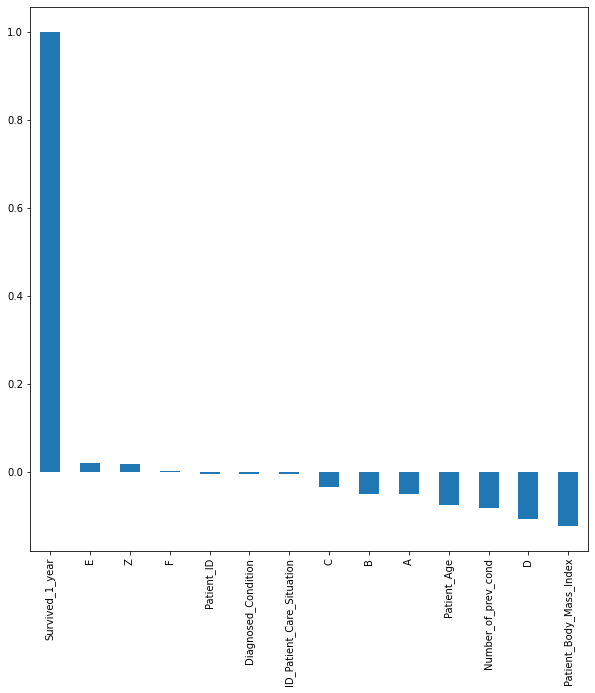

In [8]:
plt.figure(figsize=(10,10))
df.corr()['Survived_1_year'].sort_values(ascending=False).plot(kind='bar')


## check for missing values

In [9]:
df.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [10]:
df[df['Patient_Age']>=95]  ## irrevalent data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
4,33012,0,12513,NaN,128,1.3484,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
218,33008,0,12509,NaN,112,1.2925,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2540,33014,0,12515,NaN,149,1.7784,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2711,33004,0,12505,NaN,123,1.9290,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4308,33001,0,12502,NaN,114,1.6239,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4887,33011,0,12512,NaN,132,1.9896,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
6308,33010,0,12511,NaN,142,1.5701,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10388,33006,0,12507,NaN,138,1.3745,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10663,33009,0,12510,NaN,142,1.1450,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
12782,33000,0,12501,NaN,112,1.5465,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [11]:
# lets drop 13 null records from "treated with drugs" column
df.dropna(subset=['Treated_with_drugs'],inplace=True)

In [12]:
df.shape

(23084, 18)

In [13]:
df['Number_of_prev_cond'].value_counts()

1.0    9373
2.0    9016
3.0    3026
4.0     397
5.0      37
Name: Number_of_prev_cond, dtype: int64

In [14]:
df['A'].fillna(1.0,inplace=True)

In [15]:
df['B'].fillna(0.0,inplace=True)

In [16]:
df['C'].fillna(0.0,inplace=True)

In [17]:
df['D'].fillna(0.0,inplace=True)

In [18]:
df['E'].fillna(0.0,inplace=True)

In [19]:
df['F'].fillna(0.0,inplace=True)

In [20]:
df['Z'].fillna(0.0,inplace=True)

In [21]:
df['Number_of_prev_cond'].fillna(1.0,inplace=True)

In [22]:
df['Number_of_prev_cond'].value_counts()

1.0    10608
2.0     9016
3.0     3026
4.0      397
5.0       37
Name: Number_of_prev_cond, dtype: int64

In [23]:
df.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

##  In this dataset we have 392 records of patient having "0" age which is not poosible.lets           replace this "0" with the mean value of patient age.

In [24]:
df[df['Patient_Age']==0]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
270,23979,36,410,DX6,0,17.824390,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
354,31586,15,7033,DX1 DX3,0,17.620936,NO,RURAL,Stable,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1
382,16270,45,10829,DX6,0,28.782161,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
383,13729,12,8385,DX6,0,17.420418,NO,RURAL,Stable,1.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0
439,10039,51,4354,DX6,0,25.405622,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22740,10115,51,5210,DX6,0,29.808723,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
22766,10770,31,7654,DX1,0,23.645485,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0
22972,18581,13,9178,DX5,0,27.636765,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
22989,32522,8,3410,DX5,0,18.418056,NO,RURAL,Stable,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1


In [25]:
df['Patient_Age'].replace(to_replace=0,value=33,inplace=True)

In [26]:
df[df['Patient_Age']==0]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year


## Target column

In [27]:
print(df['Survived_1_year'].value_counts(normalize=True))
print(df['Survived_1_year'].value_counts())

1    0.63204
0    0.36796
Name: Survived_1_year, dtype: float64
1    14590
0     8494
Name: Survived_1_year, dtype: int64


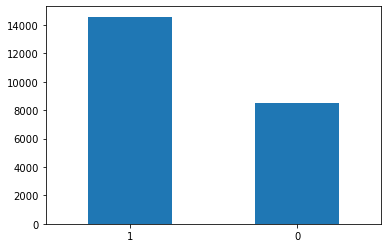

In [28]:
df['Survived_1_year'].value_counts().plot(kind='bar',rot=0)  

## independent(categorical features)

In [29]:
print(df['Patient_Smoker'].value_counts(normalize=True))
print(df['Patient_Smoker'].value_counts())

NO     0.573817
YES    0.426183
Name: Patient_Smoker, dtype: float64
NO     13246
YES     9838
Name: Patient_Smoker, dtype: int64


In [30]:
df['Patient_Rural_Urban'].value_counts()

RURAL    16121
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

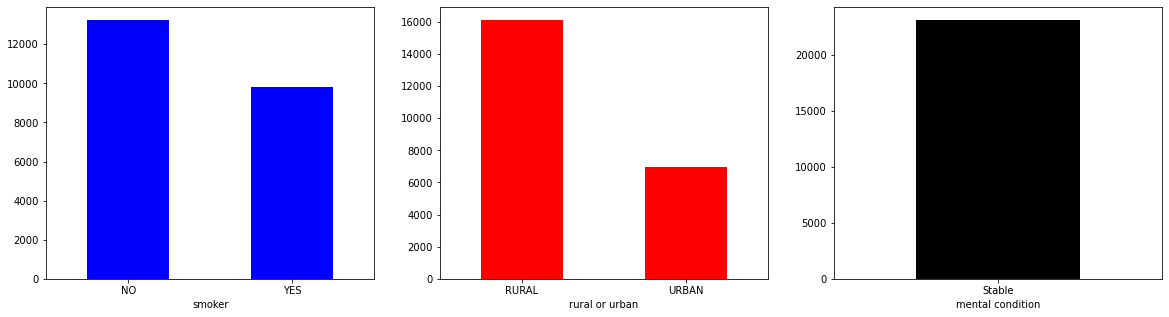

In [31]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=1,ncols=3,figsize=(20,5))
ax=df['Patient_Smoker'].value_counts().plot(kind='bar',color='blue',ax=ax1,rot=0)
ax.set_xlabel('smoker')
ax=df['Patient_Rural_Urban'].value_counts().plot(kind='bar',color='red',ax=ax2,rot=0)
ax.set_xlabel('rural or urban')
ax=df['Patient_mental_condition'].value_counts().plot(kind='bar',color='black',ax=ax3,rot=0)
ax.set_xlabel('mental condition')
plt.show()

## independent(numerical features)

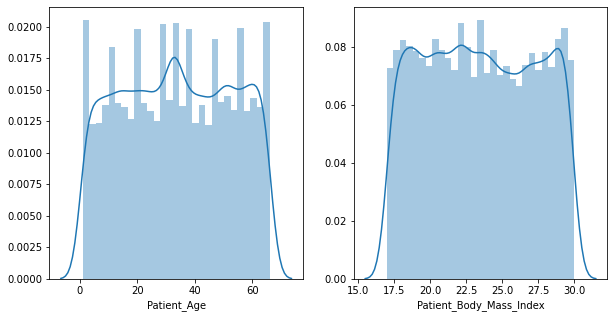

In [32]:
plt.figure(1,figsize=(10,5))
plt.subplot(121)
sns.distplot(df['Patient_Age'])
plt.subplot(122)
sns.distplot(df['Patient_Body_Mass_Index'])
plt.show()

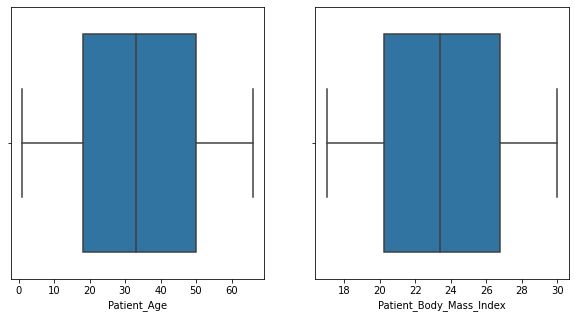

In [33]:
plt.figure(1,figsize=(10,5))
plt.subplot(121)
sns.boxplot(df['Patient_Age'])
plt.subplot(122)
sns.boxplot(df['Patient_Body_Mass_Index'])
plt.show()

### Check for the bmi between 18.5 and 24.9 ie. ideal weight. There is no record for bmi more than 30 so there is no obese patient. Also check for the overweight and underweight patients

In [34]:
df[(df['Patient_Body_Mass_Index']>=18.5) & (df['Patient_Body_Mass_Index']<=24.9)]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
6,5138,52,5296,DX3,53,19.103244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
10,14892,8,9461,DX6,60,18.690567,YES,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0
11,23133,15,4975,DX6,26,23.968051,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23089,15173,46,8795,DX6,58,21.723167,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23090,24072,40,8029,DX6,10,20.791583,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [35]:
df[(df['Patient_Body_Mass_Index']>=30.0)]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year


In [36]:
df[(df['Patient_Body_Mass_Index']>=25.0) & (df['Patient_Body_Mass_Index']<=29.9)]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
8,24349,47,6585,DX4,62,25.074482,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
14,24920,37,4704,DX1,22,27.741955,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
16,26360,14,7476,DX5,58,29.800110,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23080,5518,52,11999,DX6,35,25.988999,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23085,23781,36,721,DX5,57,29.284325,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
23087,4527,24,7809,DX2 DX5,31,27.588608,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23091,701,14,572,DX6,10,27.820924,NO,URBAN,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0


In [37]:
df[(df['Patient_Body_Mass_Index']<18.5)]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
7,17265,9,5947,DX5,3,18.126976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
9,1647,17,10190,DX6,46,17.663877,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
13,14658,44,971,DX5,23,17.039536,NO,RURAL,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1
19,30258,42,3517,DX3,22,17.637541,YES,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23034,23703,39,5551,DX1 DX3,7,17.602809,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
23041,5788,45,9309,DX6,61,17.207112,YES,RURAL,Stable,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0
23061,20620,18,8028,DX1,65,18.062645,NO,RURAL,Stable,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,0
23078,31267,7,1080,DX4,3,17.303675,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [38]:
df.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [39]:
df.drop(['Patient_ID','Patient_mental_condition'],axis=1,inplace=True)

In [40]:
df.shape

(23084, 16)

In [41]:
df['Treated_with_drugs'].describe()

count     23084
unique       32
top         DX6
freq       8606
Name: Treated_with_drugs, dtype: object

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Treated_with_drugs']= le.fit_transform(df['Treated_with_drugs'])
df['Patient_Smoker']= le.fit_transform(df['Patient_Smoker'])
df['Patient_Rural_Urban']= le.fit_transform(df['Patient_Rural_Urban'])

In [43]:
df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,31,56,18.479385,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,16,36,22.945566,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,31,48,27.510027,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,0,5,19.130976,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,10808,45,31,47,26.155120,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


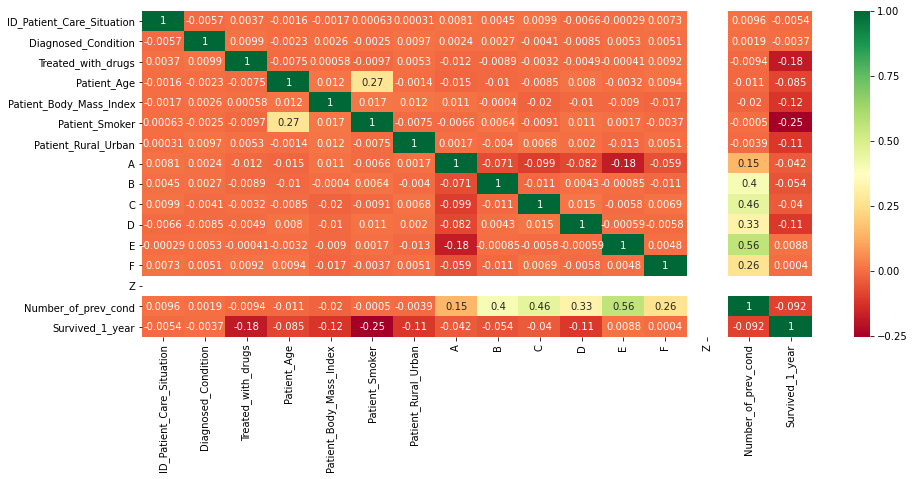

In [44]:
## again check for the corealtion
corrmat = df.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

In [45]:
y=df['Survived_1_year']
x=df.drop(['Survived_1_year'],axis=1)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [48]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17313, 15), (5771, 15), (17313,), (5771,))

## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

c:\users\anu\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_pred=lr.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.16      0.26      2078
           1       0.67      0.94      0.78      3693

    accuracy                           0.66      5771
   macro avg       0.64      0.55      0.52      5771
weighted avg       0.65      0.66      0.59      5771



In [53]:
f1_score(y_test,y_pred)

0.7809203142536475

In [54]:
cmx=confusion_matrix(y_test,y_pred)
cmx

array([[ 340, 1738],
       [ 214, 3479]], dtype=int64)

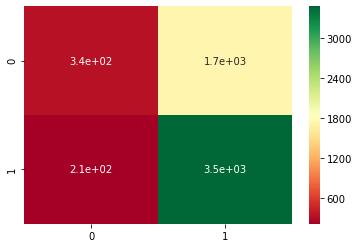

In [55]:
sns.heatmap(cmx,annot=True,cmap="RdYlGn")

In [56]:
ac=accuracy_score(y_test,y_pred)
print("Accuracy score is:",ac)

Accuracy score is: 0.6617570611679086


## RandomForest Classifier (Baseline Model)

In [57]:
from sklearn.ensemble import RandomForestClassifier
rcf=RandomForestClassifier(n_estimators=900,random_state=1900,n_jobs=-1)
rcf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=-1, oob_score=False, random_state=1900, verbose=0,
                       warm_start=False)

In [58]:
predi=rcf.predict(x_test)

In [59]:
print(classification_report(y_test,predi))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      2078
           1       0.84      0.86      0.85      3693

    accuracy                           0.81      5771
   macro avg       0.80      0.79      0.79      5771
weighted avg       0.81      0.81      0.81      5771



In [60]:
accuracy_score(y_test,predi)

0.81025818748917

In [61]:
cm=confusion_matrix(y_test,predi)
cm

array([[1482,  596],
       [ 499, 3194]], dtype=int64)

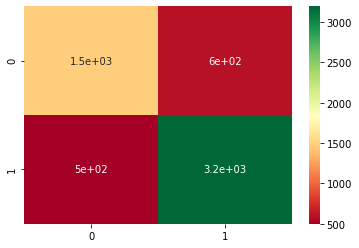

In [62]:
sns.heatmap(cm,annot=True,cmap="RdYlGn")

## Hyperparameter tuning using gridsearchcv

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameters={'n_estimators':(100,150,500,1000),'criterion':('gini','entropy'),'max_depth':(3,5,7,9,10),
            'max_features':('auto','sqrt'),'random_state':(1,42,41,89,90,56,45)}

In [65]:
clf=GridSearchCV(RandomForestClassifier(n_jobs=-1,oob_score=False),param_grid=parameters,cv=3,verbose=True)

In [67]:
#clf_grid=clf.fit(x_train,y_train)

In [ ]:
clf_grid.best_estimator_

In [ ]:
clf_grid.best_score_

## model training using hyperparameter

In [66]:
rcf_1=RandomForestClassifier(n_estimators=250,random_state=76,n_jobs=-1,criterion='entropy',warm_start=True,min_samples_leaf=4)
rcf_1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=-1, oob_score=False, random_state=76, verbose=0,
                       warm_start=True)

In [67]:
predii=rcf_1.predict(x_test)

In [68]:
print(classification_report(y_test,predii))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      2078
           1       0.85      0.87      0.86      3693

    accuracy                           0.82      5771
   macro avg       0.80      0.79      0.80      5771
weighted avg       0.82      0.82      0.82      5771



In [69]:
accuracy_score(y_test,predii)

0.816842834863975

## Try with feature selection but we have very less number of features no need to perform            feature selcetion but lets check the accuracy.

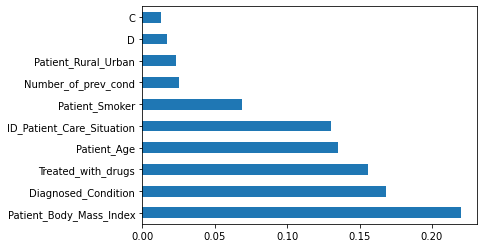

In [70]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rcf.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [71]:
from sklearn.feature_selection import SelectFromModel
sfm=SelectFromModel(rcf,threshold=0.03)
sfm=sfm.fit(x_train,y_train)

In [72]:
x_important_train = sfm.transform(x_train)
x_important_test = sfm.transform(x_test)

In [73]:
clf_important = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)
clf_important = clf_important.fit(x_important_train, y_train)

In [74]:
y_imp_predict=clf_important.predict(x_important_test)

In [75]:
## accuracy decreses in my case if i perform feature selection
accuracy_score(y_test,y_imp_predict)  

0.7839195979899497

In [76]:
confusion_matrix(y_test,y_imp_predict)

array([[1411,  667],
       [ 580, 3113]], dtype=int64)

## try with xgboost(baseline model)

In [77]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [78]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)

In [79]:
XGBClassifier?

ID_Patient_Care_Situation    0.130193
Diagnosed_Condition          0.168458
Treated_with_drugs           0.156050
Patient_Age                  0.135312
Patient_Body_Mass_Index      0.220068
Patient_Smoker               0.068772
Patient_Rural_Urban          0.023364
A                            0.012954
B                            0.011665
C                            0.012978
D                            0.016789
E                            0.012292
F                            0.005742
Z                            0.000000
Number_of_prev_cond          0.025363
dtype: float64


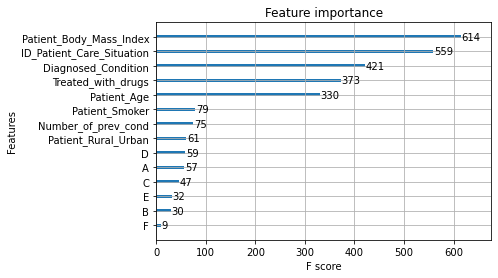

In [143]:
xgb_model=XGBClassifier(random_state=57,max_depth=5,n_jobs=-1,n_estimators=100,
                        )
xgb_model.fit(x_train,y_train)
print(feat_importances)
plot_importance(xgb_model)
plt.show()

In [144]:
selection = SelectFromModel(xgb_model)
selection.fit(x_train, y_train)

SelectFromModel(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                        colsample_bylevel=1, colsample_bynode=1,
                                        colsample_bytree=1, gamma=0, gpu_id=-1,
                                        importance_type='gain',
                                        interaction_constraints='',
                                        learning_rate=0.300000012,
                                        max_delta_step=0, max_depth=5,
                                        min_child_weight=1, missing=nan,
                                        monotone_constraints='()',
                                        n_estimators=100, n_jobs=-1,
                                        num_parallel_tree=1,
                                        objective='binary:logistic',
                                        random_state=57, reg_alpha=0,
                                        reg_lambda=1, scale_pos_weight=1,
            

In [145]:
select_x_train = selection.transform(x_train)
select_x_test = selection.transform(x_test) 
selection_model = XGBClassifier(random_state=10)
selection_model.fit(select_x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=10, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
y_preddi = xgb_model.predict(x_test)

xgb_ac = accuracy_score(y_test, y_preddi)
xgb_fscore = f1_score(y_test ,y_preddi)

print("XGB Baseline Model Accuracy:", xgb_ac)
print("XGB Baseline Model F1 Score:", xgb_fscore)

XGB Baseline Model Accuracy: 0.831051810778028
XGB Baseline Model F1 Score: 0.8692503687810111


In [147]:
print(classification_report(y_test,y_preddi))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      2078
           1       0.86      0.88      0.87      3693

    accuracy                           0.83      5771
   macro avg       0.82      0.81      0.82      5771
weighted avg       0.83      0.83      0.83      5771



In [148]:
pd.crosstab(y_test,y_preddi)

col_0,0,1
Survived_1_year,,
0,1555,523
1,452,3241


In [117]:
predictions = selection_model.predict(select_x_test)      
xgb_accuracy = accuracy_score(y_test, predictions)        
xgb_fscore = f1_score(y_test , predictions)               
# View The Accuracy Of Our Limited Feature (4 Features) Model
print("Limited Features XGBoost Model Accuracy:", xgb_accuracy)
print("Limited Features XGBoost Model F1 Score:", xgb_fscore)

Limited Features XGBoost Model Accuracy: 0.8173626754461965
Limited Features XGBoost Model F1 Score: 0.8585994097129059


In [399]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      2078
           1       0.84      0.87      0.85      3693

    accuracy                           0.81      5771
   macro avg       0.79      0.79      0.79      5771
weighted avg       0.81      0.81      0.81      5771



## import test dataset

In [118]:
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [119]:
test_new.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [120]:
test_new = test_new.drop(['Patient_ID', 'Patient_mental_condition'], axis = 1)
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,DX3,16,29.443894,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,DX6,24,26.836321,NO,URBAN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,DX4 DX5,63,25.523280,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,DX6,42,27.171155,NO,URBAN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,DX3,50,25.556192,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [121]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_new['Treated_with_drugs']= le.fit_transform(test_new['Treated_with_drugs'])
test_new['Patient_Smoker']= le.fit_transform(test_new['Patient_Smoker'])
test_new['Patient_Rural_Urban']= le.fit_transform(test_new['Patient_Rural_Urban'])

In [122]:
test_new.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,24,16,29.443894,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,31,24,26.836321,0,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,29,63,25.523280,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,31,42,27.171155,0,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,24,50,25.556192,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [149]:
pepsis=xgb_model.predict(test_new)

In [150]:
res=pd.DataFrame(pepsis)
res.index=test_new.index
res.columns=["pepsis"]
res.to_csv("prediction_results_HP.csv")